# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Syifa Afifah Fitriani
- **Email:** syifaafifahf@gmail.com
- **ID Dicoding:** syifaafifah

## Menentukan Pertanyaan Bisnis

- Bagaimana performa peminjaman sepeda dalam 1 tahun
- Bagaimana trend penyewa sepedah berdasarkan musim

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
data_df = pd.read_csv('https://raw.githubusercontent.com/syifafifah/data-analytic/refs/heads/main/data/day.csv')
data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Jumlah pemesanan sepeda per hari disetiap musim dalam 2 tahun
- Terdapat 2 segment pemesan, casual dan registered

### Assessing Data

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
data_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [5]:
data_df.duplicated().sum()

np.int64(0)

**Insight:**
- pengecekan data

### Cleaning Data

In [6]:
data_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
data_df['dteday'] = pd.to_datetime(data_df['dteday']) # mengubah kolom menjadi format datetime

**Insight:**
- no missing data
- no duplicate

## Exploratory Data Analysis (EDA)

### Explore data bike sharing dataset - day

In [8]:
data_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
435,436,2012-03-11,1,1,3,0,0,0,1,0.361739,0.359670,0.476957,0.222587,1658,3253,4911
439,440,2012-03-15,1,1,3,0,4,1,1,0.557500,0.532825,0.579583,0.149883,1005,5187,6192
545,546,2012-06-29,3,1,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417,829,4634,5463
195,196,2011-07-15,3,0,7,0,5,1,1,0.663333,0.624371,0.591250,0.182833,1318,4220,5538
23,24,2011-01-24,1,0,1,0,1,1,1,0.097391,0.117930,0.491739,0.158330,86,1330,1416
208,209,2011-07-28,3,0,7,0,4,1,1,0.779167,0.739900,0.583333,0.178479,606,3784,4390
580,581,2012-08-03,3,1,8,0,5,1,2,0.765833,0.722867,0.642500,0.215792,1328,5847,7175
82,83,2011-03-24,2,0,3,0,4,1,2,0.285000,0.270833,0.805833,0.243787,166,1699,1865
597,598,2012-08-20,3,1,8,0,1,1,2,0.635833,0.595967,0.734167,0.129979,1026,5504,6530
114,115,2011-04-25,2,0,4,0,1,1,1,0.606667,0.574500,0.776667,0.185333,773,3300,4073


In [9]:
data_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [10]:
data_df.instant.is_unique

True

In [11]:
data_df.dteday.duplicated

<bound method Series.duplicated of 0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]>

In [12]:
data_df.groupby(by='season').cnt.sum()

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [13]:
data_df.groupby(by='workingday').cnt.sum()

,cnt
workingday,
0,1000269
1,2292410


In [14]:
data_df.groupby(by=['yr','mnth', 'season']).agg({
    "instant": "nunique",
    "cnt": "sum"
}) #.sort_values(by="cnt", ascending=False)

instant     cnt
yr mnth season                 
0  1    1            31   38189
   2    1            28   48215
   3    1            20   41206
        2            11   22839
   4    2            30   94870
   5    2            31  135821
   6    2            20   93786
        3            10   49726
   7    3            31  141341
   8    3            31  136691
   9    3            22   91892
        4             8   35526
   10   4            31  123511
   11   4            30  102167
   12   1            11   22390
        4            20   64933
1  1    1            31   96744
   2    1            29  103137
   3    1            20  100859
        2            11   64016
   4    2            30  174224
   5    2            31  195865
   6    2            20  137168
        3            10   65662
   7    3            31  203607
   8    3            31  214503
   9    3            22  157707
        4             8   60866
   10   4            31  198841
   11   4            30  152664
   12   1            11   20608
        4            20  103105

**Insight:**
- Persebaran data penyewaan sepeda untuk 2 tahun

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa peminjaman sepeda dalam 1 tahun?

In [15]:
monthly_data_df = data_df.resample(rule='ME', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
monthly_data_df.index = monthly_data_df.index.strftime('%b %Y')
monthly_data_df = monthly_data_df.reset_index()
monthly_data_df.head()

# ambil performa pada 1 tahun (2021)
monthly_data_df_ly = monthly_data_df[monthly_data_df['dteday'].str.contains('2012')]
monthly_data_df_ly = monthly_data_df_ly.reset_index()
monthly_data_df_ly.rename(columns={
    "dteday": "period",
    "instant": "count_of_rental",
    "cnt": "total_of_sharing_bike"
}, inplace = True)
monthly_data_df_ly.head()

,index,period,count_of_rental,total_of_sharing_bike
0,12,Jan 2012,31,96744
1,13,Feb 2012,29,103137
2,14,Mar 2012,31,164875
3,15,Apr 2012,30,174224
4,16,May 2012,31,195865


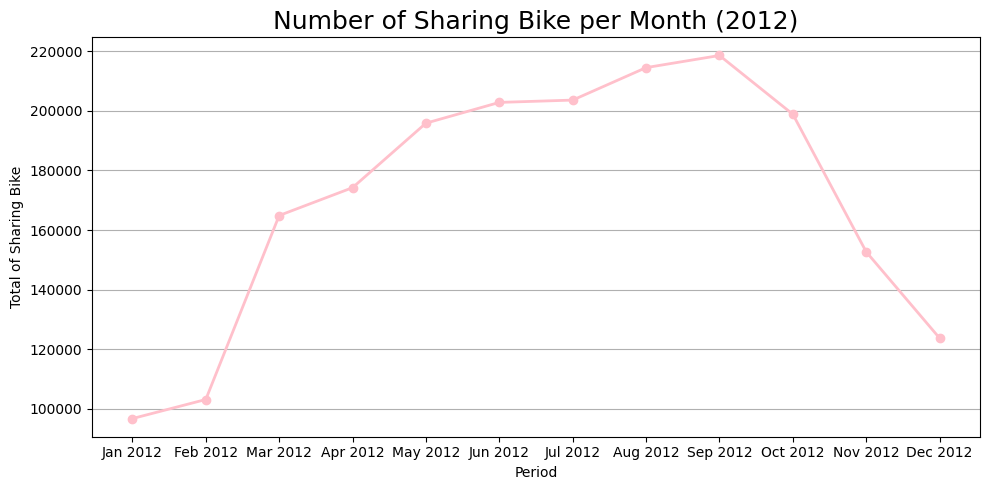

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_data_df_ly["period"],
    monthly_data_df_ly["total_of_sharing_bike"],
    marker = 'o',
    linewidth = 2,
    color = 'pink'
)
plt.title("Number of Sharing Bike per Month (2012)", loc='center', fontsize=18)
plt.xlabel("Period")
plt.ylabel("Total of Sharing Bike")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Insight:
- Penyewaan sepeda tertinggi pada bulan September di tahun 2012
- Penyewaan sepeda terendah pada bulan Januari di tahun 2012

### Pertanyaan 2: Bagaimana trend penyewa sepedah berdasarkan musim

In [17]:
mapping_season = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# kolom season dan period (month year)
data_df['season_name'] = data_df['season'].map(mapping_season)
data_df['year_month'] = data_df['dteday'].dt.strftime('%Y')

# Agregasi jumlah penyewaan per period dan musim
# monthly_season_df = data_df.groupby(by=['period', 'season_name']).agg({
#    "instant": "nunique",
#    "cnt": "sum"
#})

monthly_season_df = data_df.groupby(['year_month', 'season_name'])['cnt'].sum().reset_index()
monthly_season_df['year_month'] = monthly_season_df['year_month'].astype(str)
monthly_season_df.head().sort_values(by='year_month', ascending=True)

,year_month,season_name,cnt
0,2011,Fall,419650
1,2011,Spring,150000
2,2011,Summer,347316
3,2011,Winter,326137
4,2012,Fall,641479


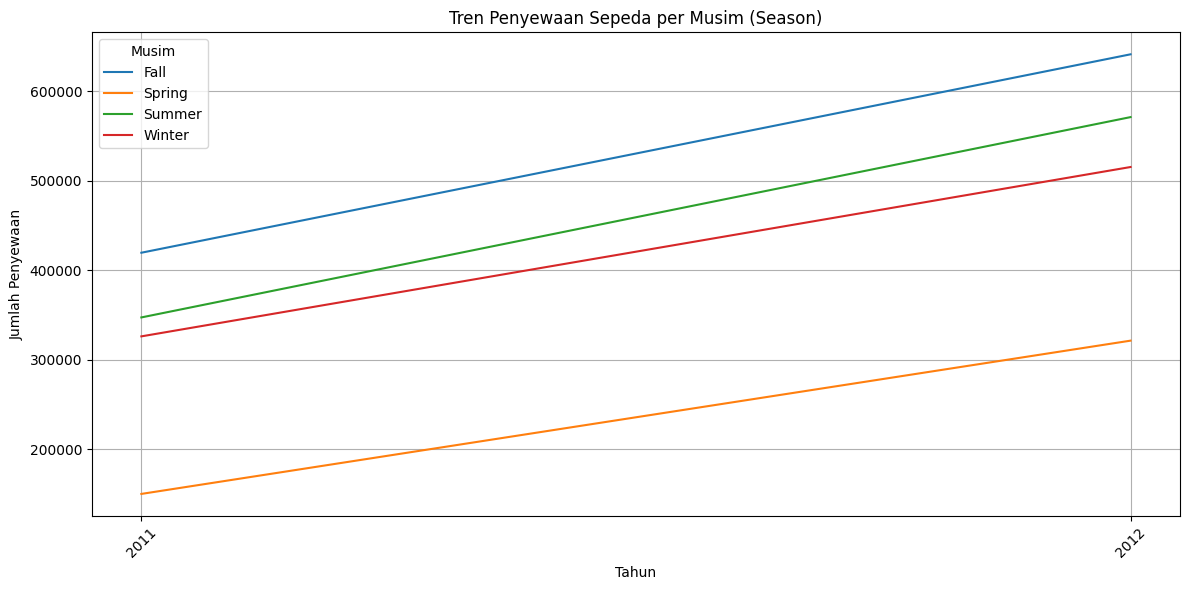

In [18]:
plt.figure(figsize=(12, 6))

for season in monthly_season_df['season_name'].unique():
    season_data = monthly_season_df[monthly_season_df['season_name'] == season]
    plt.plot(season_data['year_month'], season_data['cnt'], label=season)

plt.title('Tren Penyewaan Sepeda per Musim (Season)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend(title='Musim')
plt.tight_layout()
plt.grid(True)
plt.show()

In [117]:
data_df.to_csv('data_df.csv', index=False)

**Insight:**
- Penyewaan sepeda tertinggi terjadi saat musim gugur (fall Jun - Sep)

## Analisis Lanjutan (Opsional)

## Conclusion

- Performa tertinggi dalam hal jumlah penyewaan sepeda berdasarkan musim adalah saat musim gugur (Fall), yang kemungkinan disebabkan oleh cuaca yang relatif nyaman untuk bersepedah, lingkungan yang indah karena perubahan warna dedaunan, dan aktivitas outdoor yang relatif tinggi sebelum memasuki musim dingin
- Musim gugur dapat menjadi momentum yang tepat untuk penyedia layanan bike sharing untuk meningkatkan promosi, keterdiaan, dan layanan tambahan untuk mengoptimalkan pendapatan